In [3]:
# Helper functions
from notebooks.util.distribution_utils import *

from liquidity.util.utils import compute_returns
from hurst_exponent.util.utils import augmented_dickey_fuller

In [4]:
# Automatically reload changes in package dependencies
%load_ext autoreload
%autoreload 2

In [5]:
# Number of events to use
EVENTS_RANGE = 100000

## Load raw sample data

In [6]:
# Load orderbook raw sample data
stocks = ['TSLA', 'AMZN', 'NFLX', 'MSFT', 'EBAY', 'APPL']

current_dir = os.path.abspath('.')
root_dir = os.path.join(current_dir, '..', '..')
data_dir = os.path.join(root_dir, 'data', 'market_orders')

stock_dfs = {}

# Loop through each stock
for stock in stocks:

    filename = f"{stock}-2016-R1.csv"

    stock_file_path = os.path.join(data_dir, filename)

    # Read the CSV and store in the dictionary
    stock_dfs[stock] = pd.read_csv(stock_file_path)

# Access the dataframe using stock's ticker as key
tsla_raw_df = stock_dfs['TSLA']
amzn_raw_df = stock_dfs['AMZN']
nflx_raw_df = stock_dfs['NFLX']
msft_raw_df = stock_dfs['MSFT']
ebay_raw_df = stock_dfs['EBAY']
appl_raw_df = stock_dfs['APPL']

## 1. Returns

In [5]:
# Compute returns
tsla_returns = compute_returns(tsla_raw_df)['returns']
msft_returns  = compute_returns(msft_raw_df)['returns']
amzn_returns  = compute_returns(amzn_raw_df)['returns']
nflx_returns  = compute_returns(nflx_raw_df)['returns']
ebay_returns  = compute_returns(ebay_raw_df)['returns']
appl_returns = compute_returns(appl_raw_df)['returns']

returns = {
  'TSLA': tsla_returns,
  'MSFT': msft_returns,
  'AMZN': amzn_returns,
  'NFLX': nflx_returns,
  'EBAY': ebay_returns,
  'APPL': appl_returns
}

### 1.1. Stationarity Test

To test whether our time series are stationary, we perform an augmented Dickey-Fuller test on each series, which uses the following null and alternative hypotheses:

- **H0:** The time series is non-stationary.
  - In other words, it has some time-dependent structure and does not have constant variance over time.
  - There is at least one unit root.

- **H1:** The time series is stationary.

- **Note:** If the p-value from the test is less than some significance level (e.g. $\alpha$ = .05), then we can reject the null hypothesis and conclude that the time series is stationary.

In [7]:
# ADF test
for stock, data in returns.items():
    augmented_dickey_fuller(data.head(EVENTS_RANGE), stock)

TSLA
ADF: -320.14
p-value: 0.00,
N: 99999, 
critical values: {'1%': -3.4304153953326493, '5%': -2.8615689037124814, '10%': -2.566785384434747}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


MSFT
ADF: -319.31
p-value: 0.00,
N: 99999, 
critical values: {'1%': -3.4304153953326493, '5%': -2.8615689037124814, '10%': -2.566785384434747}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


AMZN
ADF: -322.06
p-value: 0.00,
N: 99999, 
critical values: {'1%': -3.4304153953326493, '5%': -2.8615689037124814, '10%': -2.566785384434747}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


NFLX
ADF: -178.95
p-value: 0.00,
N: 99997, 
critical values: {'1%': -3.4304153966406288, '5%': -2.8615689042905816, '10%': -2.5667853847424507}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.



### 1.2. Plot returns density functions

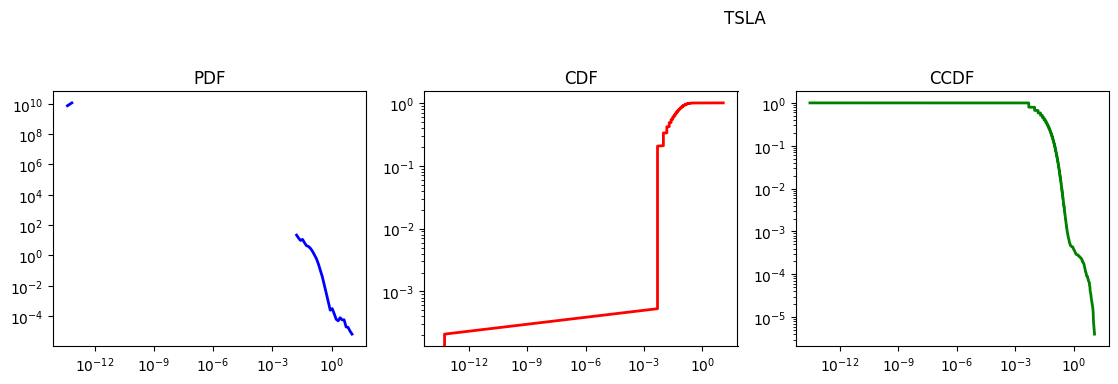

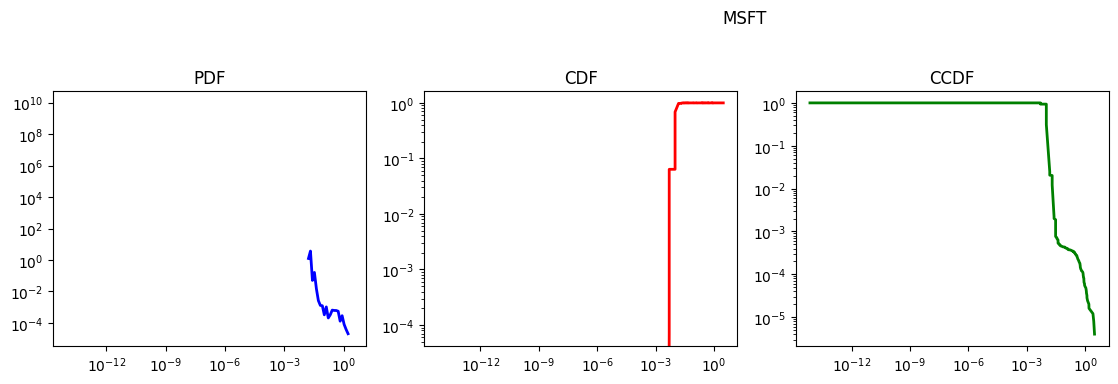

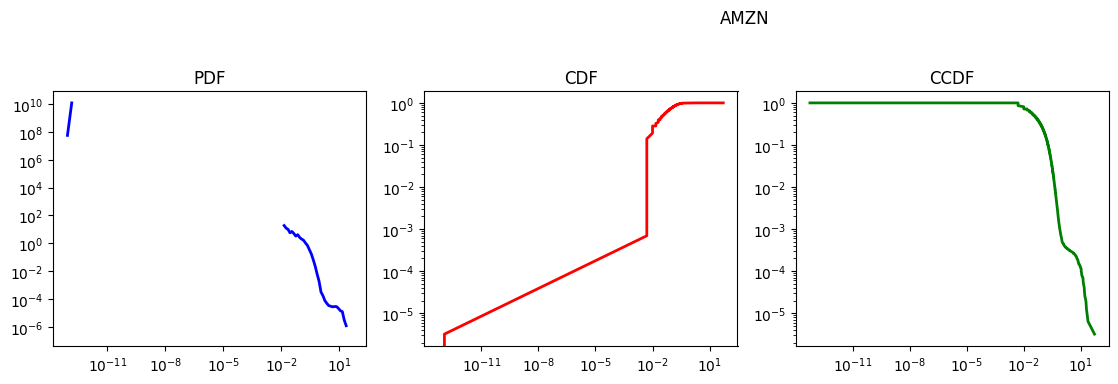

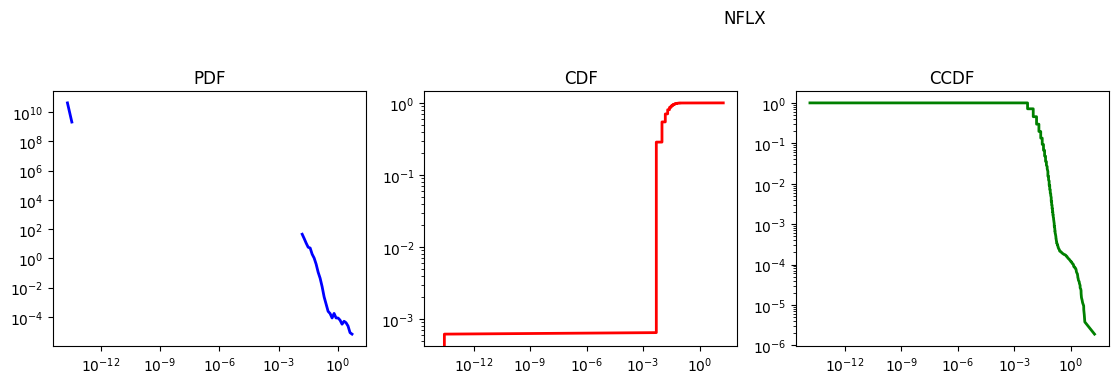

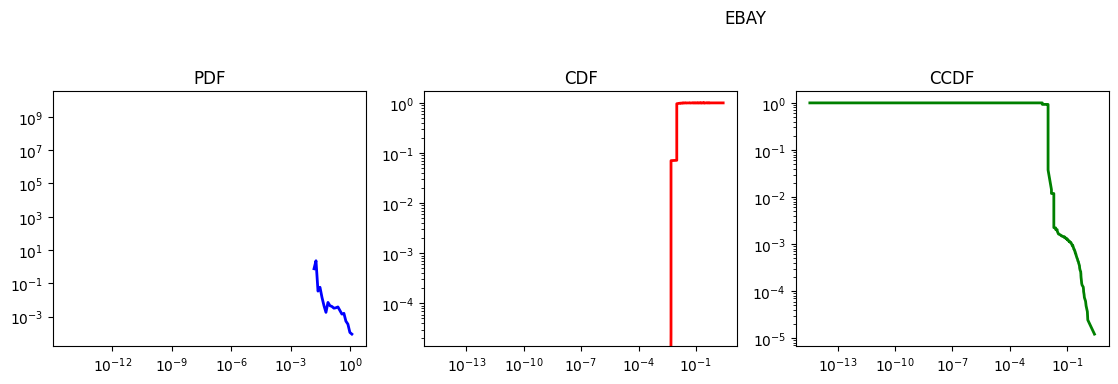

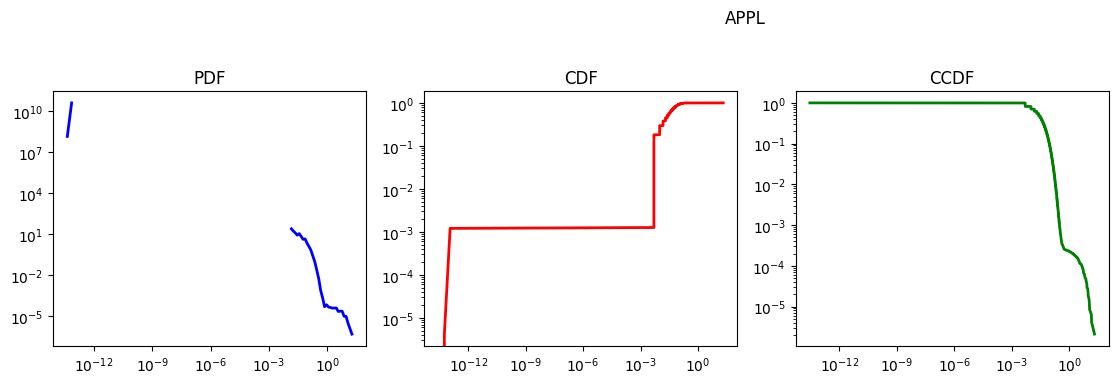

In [6]:
# Plot for each stock
for stock_name, data in returns.items():
    plot_distributions(stock_name, data)

### 1.3. Fit returns power law distribution

In [7]:
# 1. Fit Powerlaw and retrieve fitted object/ results
returns_distributions_data = os.path.join(root_dir, 'data', 'generated', 'mo_data', 'distributions', 'mo_returns_distributions.pkl')

if not os.path.exists(returns_distributions_data):
    returns_fit_objects = fit_powerlaw(returns, filename=returns_distributions_data)
else:
    returns_fit_objects = load_fit_objects(returns_distributions_data)

returns_fit_objects

{'TSLA': <powerlaw.Fit at 0x316b8f390>,
 'MSFT': <powerlaw.Fit at 0x316adea50>,
 'AMZN': <powerlaw.Fit at 0x316ad1010>,
 'NFLX': <powerlaw.Fit at 0x32b1d2950>,
 'EBAY': <powerlaw.Fit at 0x32b16e4d0>,
 'APPL': <powerlaw.Fit at 0x316b75010>}

/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: divide by zero encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or ov

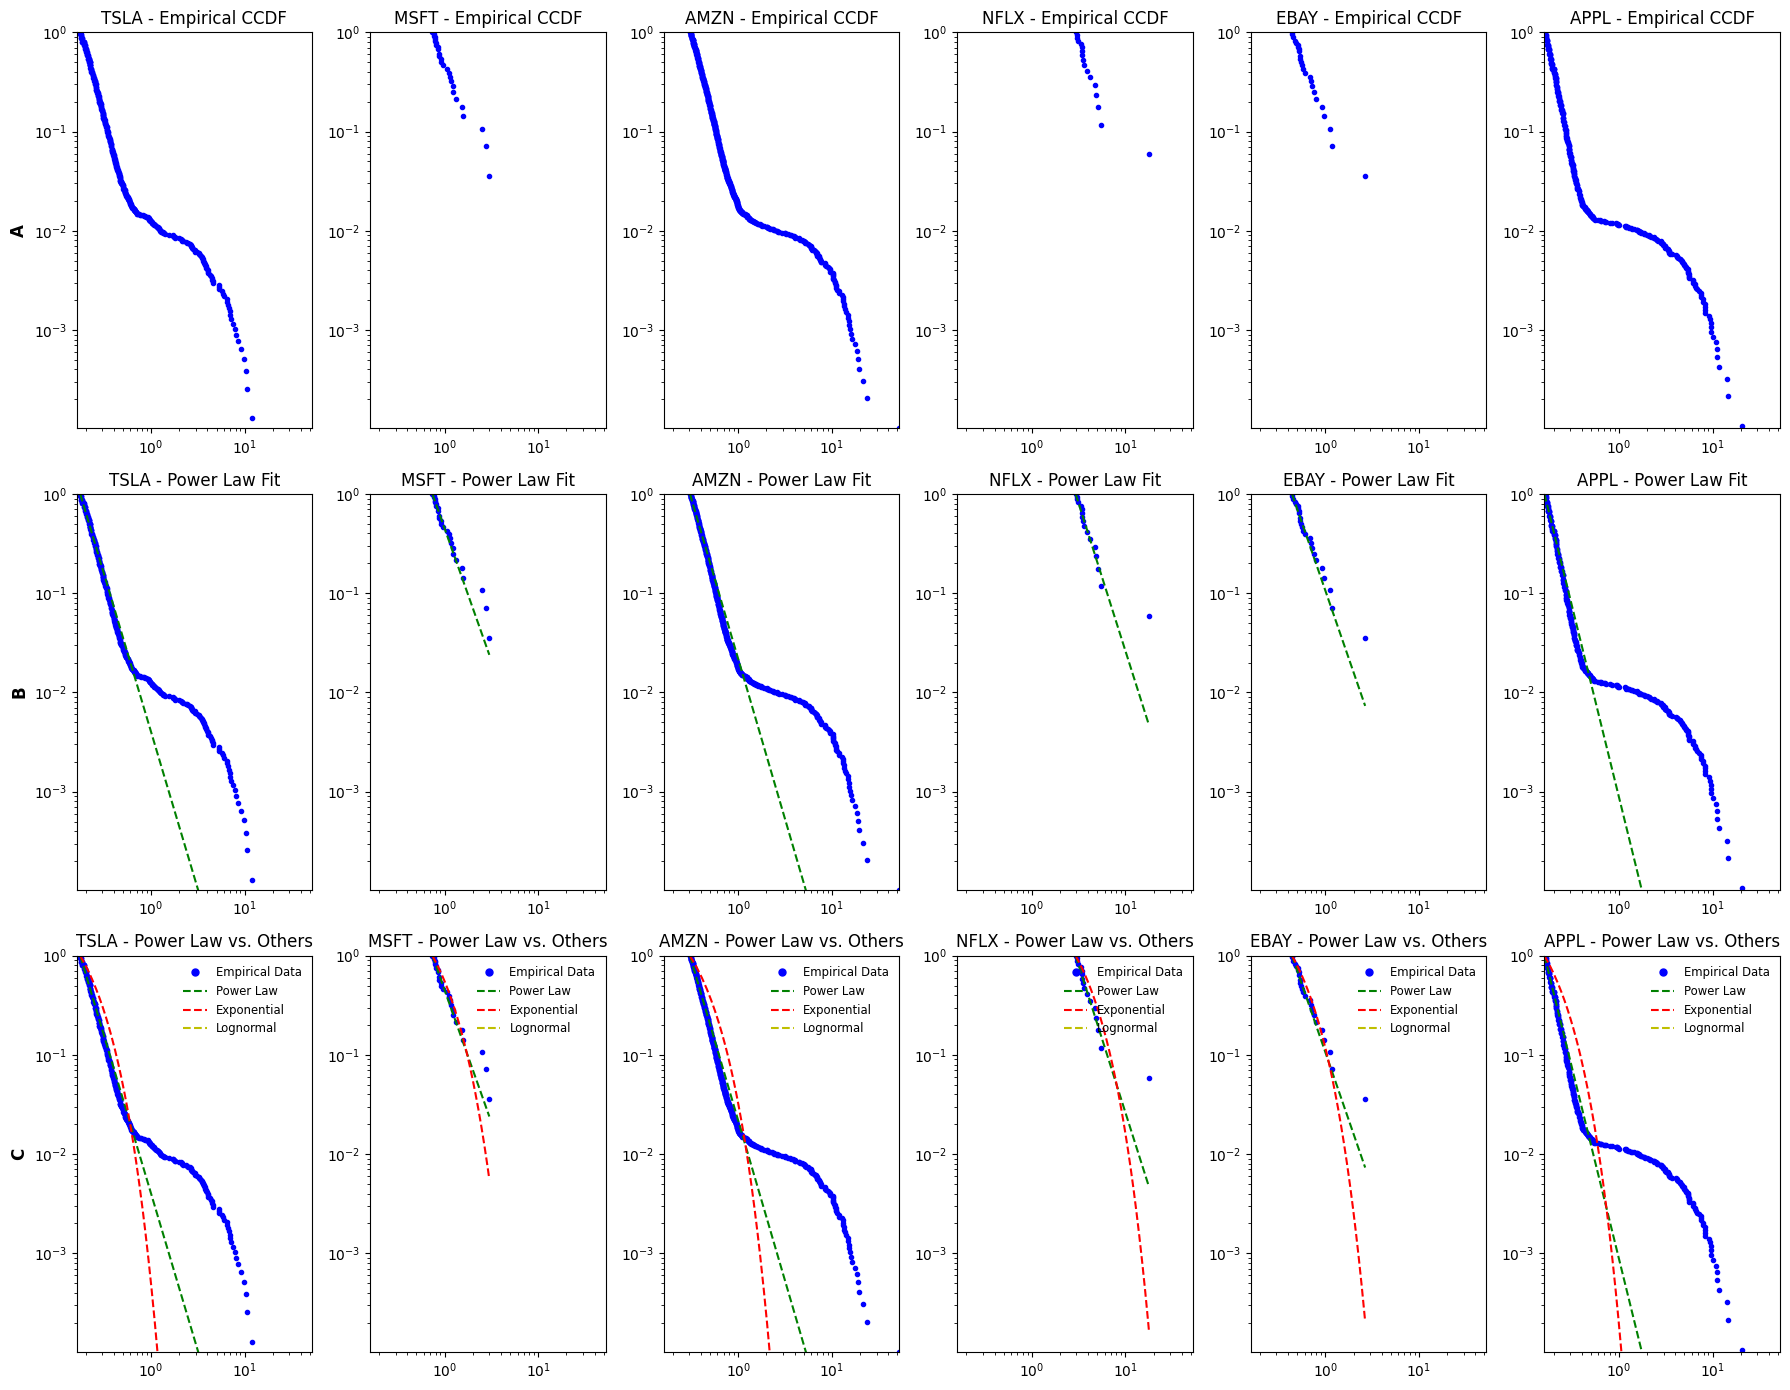

In [8]:
# Plot fitted objects
plot_fit_objects(returns_fit_objects)

#### 1.3.1. Retrieve returns power law fitting results

In [9]:
# Get fitting parameters for specific distribution across all stocks
returns_power_results = get_fitting_params(returns_fit_objects, 'power_law')
print(returns_power_results)

  Stock Distribution     alpha   xmin  KS Distance
0  TSLA    power_law  4.168750  0.175     0.046951
1  MSFT    power_law  3.666684  0.740     0.078051
2  AMZN    power_law  4.225545  0.305     0.031444
3  NFLX    power_law  3.974212  2.940     0.079087
4  EBAY    power_law  3.732640  0.440     0.081979
5  APPL    power_law  4.838828  0.160     0.055147


In [10]:
# Average Alpha exponents across stocks
min_alpha = returns_power_results['alpha'].min()
max_alpha = returns_power_results['alpha'].max()
avg_alpha = returns_power_results['alpha'].mean()
std_dev_alpha = returns_power_results['alpha'].std()

print(f"Min Alpha: {min_alpha}")
print(f"Max Alpha: {max_alpha}")
print(f"Average Alpha: {avg_alpha}")
print(f"std_dev_alpha: {std_dev_alpha}")

Min Alpha: 3.6666837394081133
Max Alpha: 4.838827838679827
Average Alpha: 4.1011096370660205
std_dev_alpha: 0.42541423300855186


#### 1.3.2. Compare Alternative Distributions

In [11]:
# Compare against alternative heavy-tailed distributions
from IPython.display import display
returns_powerlaw_exponential = distribution_compare(returns_fit_objects, 'exponential')
display(returns_powerlaw_exponential)

,Stock,Alternative Distribution,Lambda,xmin,Power Law Alpha,KS Distance (Power Law),KS Distance (exponential),Loglikelihood Ratio,p-value
0,TSLA,exponential,9.242861,0.175,4.168750,0.046951,0.203513,9.694856,3.170851e-22
1,MSFT,exponential,2.296925,0.740,3.666684,0.078051,0.170427,1.460363,1.441904e-01
2,AMZN,exponential,4.939013,0.305,4.225545,0.031444,0.231032,10.412466,2.175127e-25
3,NFLX,exponential,0.584483,2.940,3.974212,0.079087,0.199483,1.564487,1.177033e-01
4,EBAY,exponential,3.825132,0.440,3.732640,0.081979,0.179619,1.228318,2.193277e-01
5,APPL,exponential,10.191810,0.160,4.838828,0.055147,0.291514,11.794545,4.164450e-32


## 2. Percentage returns

In [12]:
# Compute percentage returns
tsla_percentage_returns = compute_returns(tsla_raw_df)['pct_returns']
msft_percentage_returns = compute_returns(msft_raw_df)['pct_returns']
amzn_percentage_returns = compute_returns(amzn_raw_df)['pct_returns']
nflx_percentage_returns = compute_returns(nflx_raw_df)['pct_returns']
ebay_percentage_returns = compute_returns(ebay_raw_df)['pct_returns']
appl_percentage_returns = compute_returns(appl_raw_df)['pct_returns']

percentage_returns = {
  'TSLA': tsla_percentage_returns,
  'MSFT': msft_percentage_returns,
  'AMZN': amzn_percentage_returns,
  'NFLX': nflx_percentage_returns,
  'EBAY': ebay_percentage_returns,
  'APPL': appl_percentage_returns
}
# Update the dictionary to only keep the first EVENTS_RANGE items
percentage_returns = {stock: data.head(EVENTS_RANGE) for stock, data in percentage_returns.items()}

### 2.1. Stationarity Test

In [15]:
# ADF test
for stock, data in percentage_returns.items():
    augmented_dickey_fuller(data.head(EVENTS_RANGE), stock)

TSLA
ADF: -320.27
p-value: 0.00,
N: 99998, 
critical values: {'1%': -3.4304153959866324, '5%': -2.861568904001529, '10%': -2.5667853845885973}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


MSFT
ADF: -319.33
p-value: 0.00,
N: 99998, 
critical values: {'1%': -3.4304153959866324, '5%': -2.861568904001529, '10%': -2.5667853845885973}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


AMZN
ADF: -322.15
p-value: 0.00,
N: 99998, 
critical values: {'1%': -3.4304153959866324, '5%': -2.861568904001529, '10%': -2.5667853845885973}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


NFLX
ADF: -178.88
p-value: 0.00,
N: 99996, 
critical values: {'1%': -3.430415397294638, '5%': -2.86156890457964, '10%': -2.566785384896307}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


EBA

### 2.2. Percentage return density functions

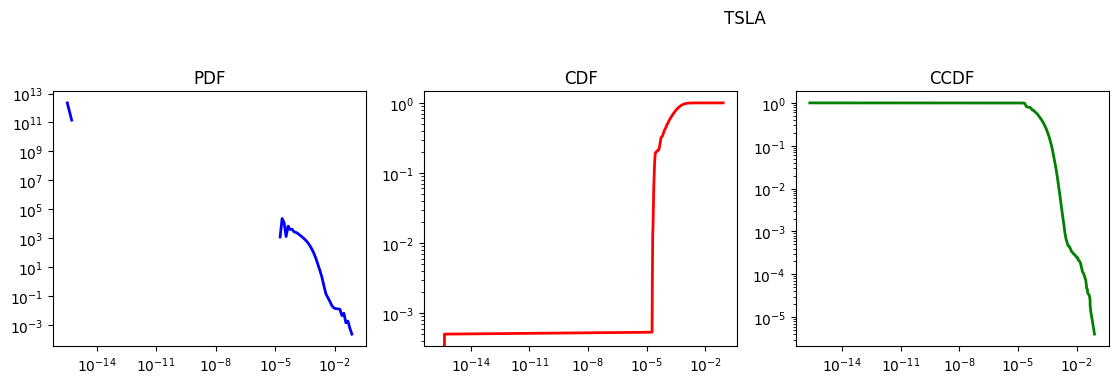

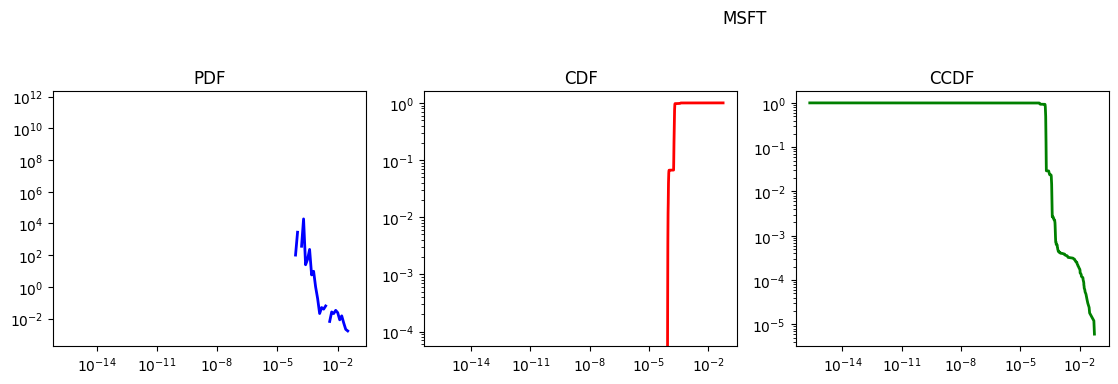

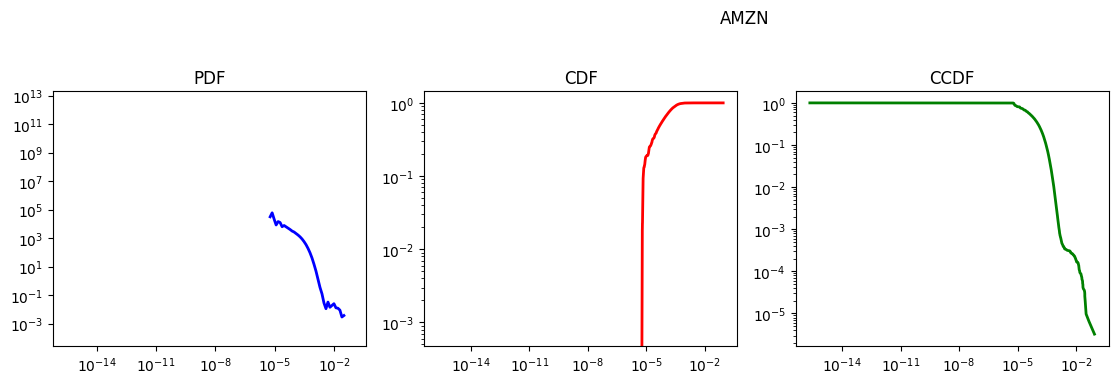

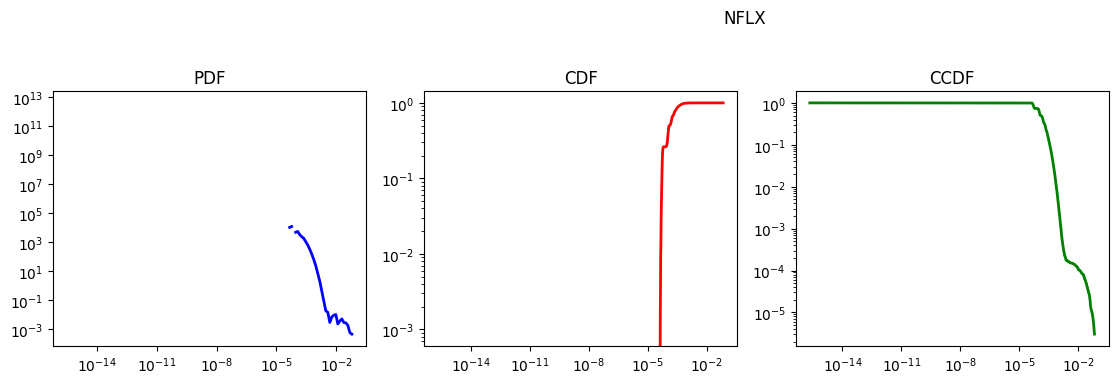

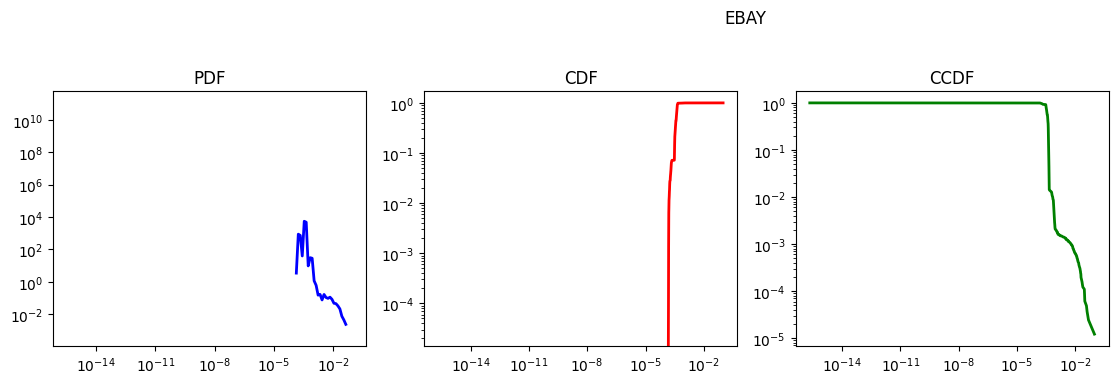

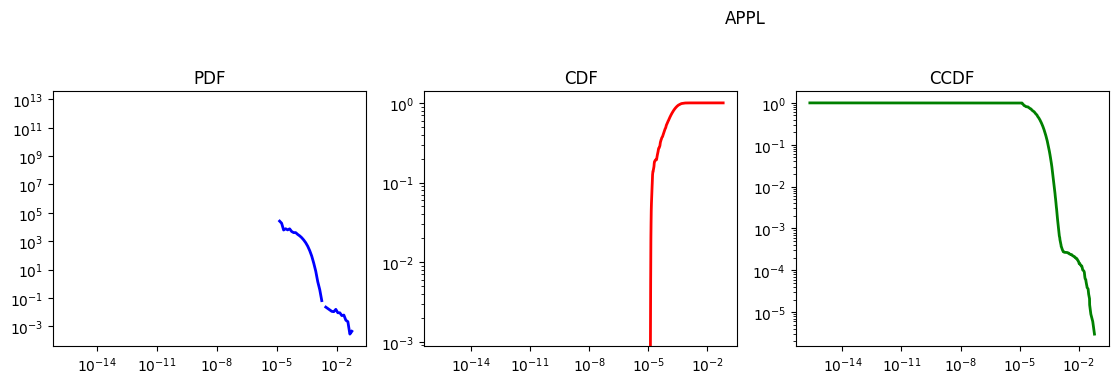

In [13]:
# Plot distribution of returns_magnitudes for each stock
for stock_name, data in percentage_returns.items():
    plot_distributions(stock_name, data)

### 2.3. Fit power law distribution to percentage returns

In [14]:
# 1. Fit Powerlaw and retrieve fitted object/ results
percentage_returns_distributions_data = os.path.join(root_dir, 'data', 'generated', 'mo_data', 'distributions', 'mo_percentage_returns_distributions.pkl')

if not os.path.exists(percentage_returns_distributions_data):
    percentage_returns_fit_objects = fit_powerlaw(percentage_returns, filename=percentage_returns_distributions_data)
else:
    percentage_returns_fit_objects = load_fit_objects(percentage_returns_distributions_data)

percentage_returns_fit_objects

{'TSLA': <powerlaw.Fit at 0x316ad6b10>,
 'MSFT': <powerlaw.Fit at 0x354a469d0>,
 'AMZN': <powerlaw.Fit at 0x3148e1cd0>,
 'NFLX': <powerlaw.Fit at 0x3148e1390>,
 'EBAY': <powerlaw.Fit at 0x301927cd0>,
 'APPL': <powerlaw.Fit at 0x301925dd0>}

/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: divide by zero encountered in divide
  CDF = CDF/norm
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or ov

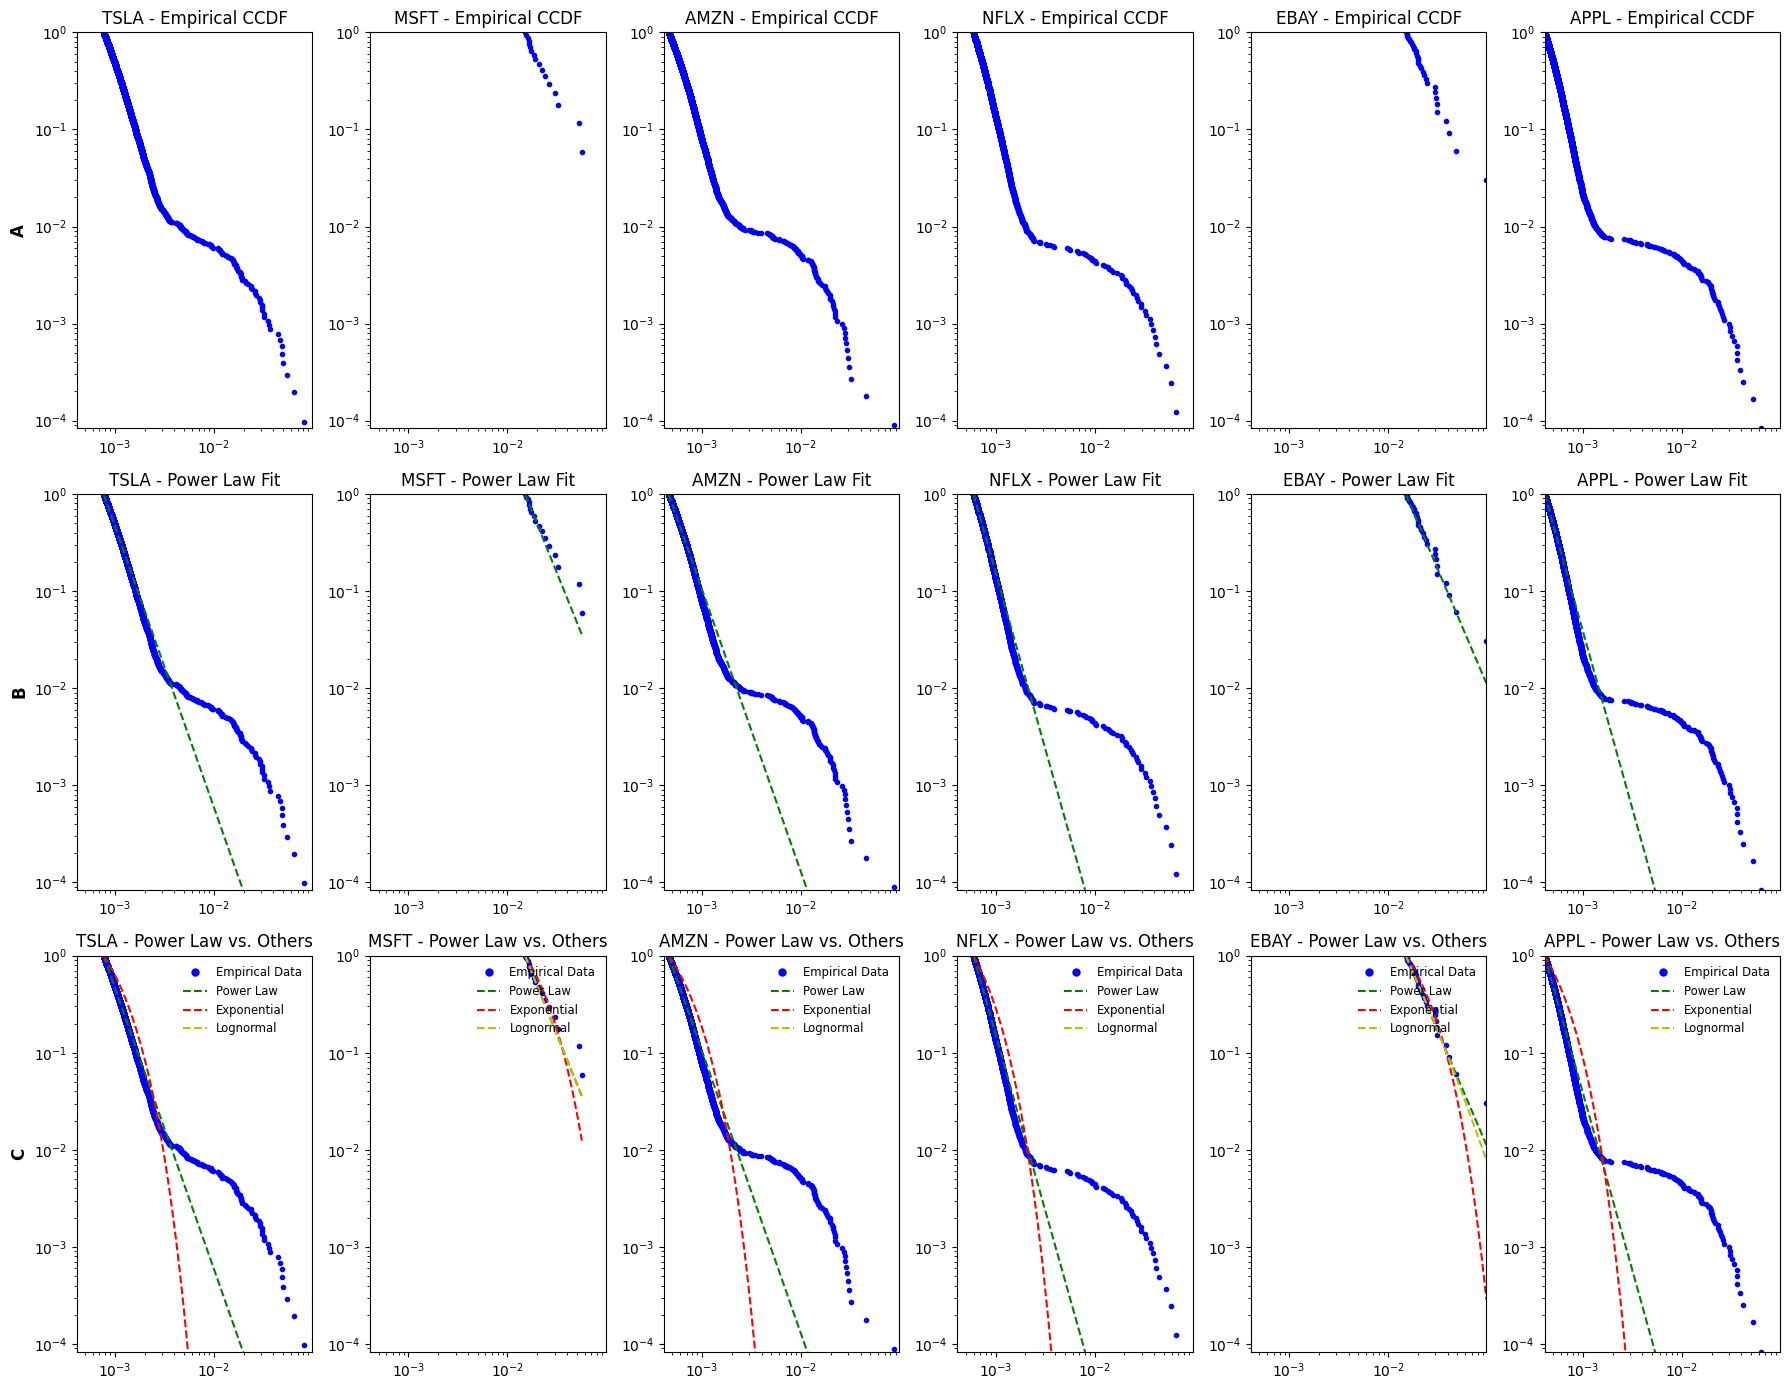

In [15]:
# Plot fitted objects
plot_fit_objects(percentage_returns_fit_objects)

#### 2.3.1. Retrieve Power law fitting results

In [16]:
# Get fitting parameters for specific distribution across all stocks
percentage_returns_power_results = get_fitting_params(percentage_returns_fit_objects, 'power_law')
print(percentage_returns_power_results)

  Stock Distribution     alpha      xmin  KS Distance
0  TSLA    power_law  3.897987  0.000771     0.019991
1  MSFT    power_law  3.519558  0.015025     0.075593
2  AMZN    power_law  3.914663  0.000461     0.028308
3  NFLX    power_law  4.620739  0.000599     0.020993
4  EBAY    power_law  3.392282  0.015018     0.075980
5  APPL    power_law  4.659445  0.000413     0.028661


In [17]:
# Average Alpha exponents across stocks
min_alpha = percentage_returns_power_results['alpha'].min()
max_alpha = percentage_returns_power_results['alpha'].max()
avg_alpha = percentage_returns_power_results['alpha'].mean()
std_dev_alpha = percentage_returns_power_results['alpha'].std()

print(f"Min Alpha: {min_alpha}")
print(f"Max Alpha: {max_alpha}")
print(f"Average Alpha: {avg_alpha}")
print(f"std_dev_alpha: {std_dev_alpha}")

Min Alpha: 3.3922822530403898
Max Alpha: 4.659444798928611
Average Alpha: 4.000779066216876
std_dev_alpha: 0.5362862291924148


#### 2.3.2. Compare Alternative Distributions

In [18]:
# Compare against alternative heavy-tailed distributions
from IPython.display import display
percentage_returns_powerlaw_exponential = distribution_compare(percentage_returns_fit_objects, 'exponential')
display(percentage_returns_powerlaw_exponential)

,Stock,Alternative Distribution,Lambda,xmin,Power Law Alpha,KS Distance (Power Law),KS Distance (exponential),Loglikelihood Ratio,p-value
0,TSLA,exponential,1993.895885,0.000771,3.897987,0.019991,0.162308,8.536606,1.382221e-17
1,MSFT,exponential,106.012346,0.015025,3.519558,0.075593,0.154649,0.941686,3.463532e-01
2,AMZN,exponential,3150.412242,0.000461,3.914663,0.028308,0.181361,9.018807,1.901495e-19
3,NFLX,exponential,3071.515943,0.000599,4.620739,0.020993,0.195193,7.166299,7.705255e-13
4,EBAY,exponential,98.067612,0.015018,3.392282,0.075980,0.123586,0.798590,4.245284e-01
5,APPL,exponential,4100.738416,0.000413,4.659445,0.028661,0.226473,9.678804,3.710295e-22


## 3. Log Returns

In [7]:
# Compute log returns
tsla_log_returns = compute_returns(tsla_raw_df, )['log_returns']
msft_log_returns = compute_returns(msft_raw_df, )['log_returns']
amzn_log_returns = compute_returns(amzn_raw_df,)['log_returns']
nflx_log_returns = compute_returns(nflx_raw_df, )['log_returns']
ebay_log_returns = compute_returns(ebay_raw_df,)['log_returns']
appl_log_returns = compute_returns(appl_raw_df,)['log_returns']

log_returns = {
  'TSLA': tsla_log_returns,
  'MSFT': msft_log_returns,
  'AMZN': amzn_log_returns,
  'NFLX': nflx_log_returns,
  'EBAY': ebay_log_returns,
  'APPL': appl_log_returns
}
# Update the dictionary to only keep the first EVENTS_RANGE items
log_returns = {stock: data.head(EVENTS_RANGE) for stock, data in log_returns.items()}

### 3.1. Stationarity Test

In [22]:
# ADF test
for stock, data in log_returns.items():
    augmented_dickey_fuller(data.head(EVENTS_RANGE), stock)

TSLA
ADF: -320.24
p-value: 0.00,
N: 99998, 
critical values: {'1%': -3.4304153959866324, '5%': -2.861568904001529, '10%': -2.5667853845885973}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


MSFT
ADF: -319.34
p-value: 0.00,
N: 99998, 
critical values: {'1%': -3.4304153959866324, '5%': -2.861568904001529, '10%': -2.5667853845885973}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


AMZN
ADF: -322.02
p-value: 0.00,
N: 99998, 
critical values: {'1%': -3.4304153959866324, '5%': -2.861568904001529, '10%': -2.5667853845885973}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


NFLX
ADF: -178.91
p-value: 0.00,
N: 99996, 
critical values: {'1%': -3.430415397294638, '5%': -2.86156890457964, '10%': -2.566785384896307}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


EBA

### 3.2. Log return density functions

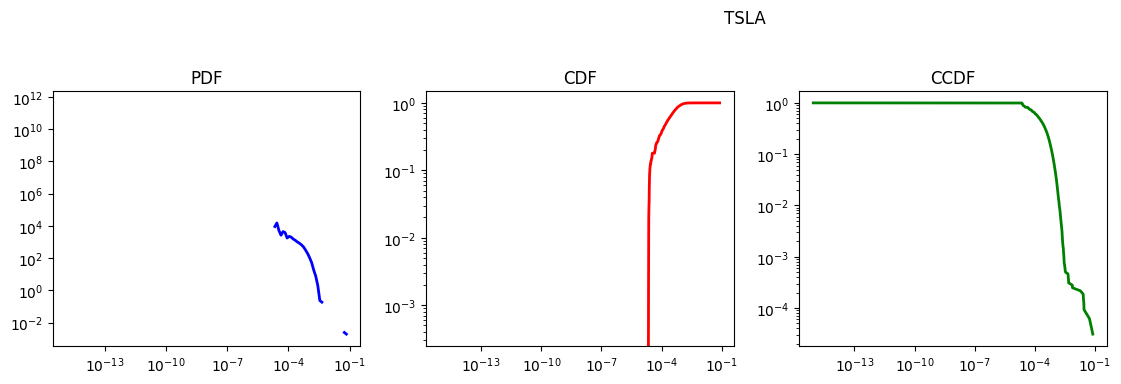

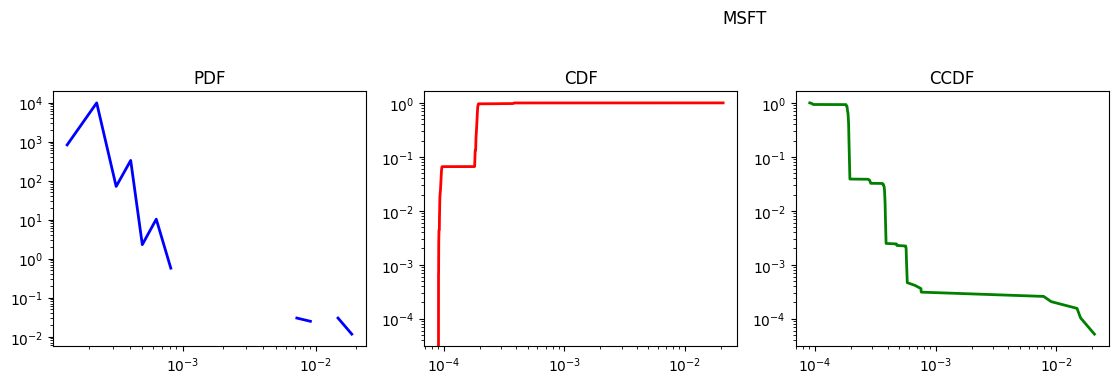

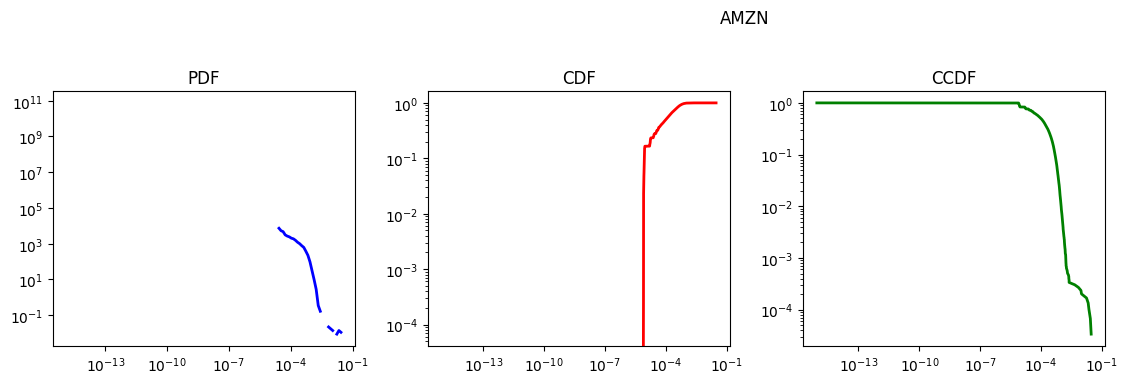

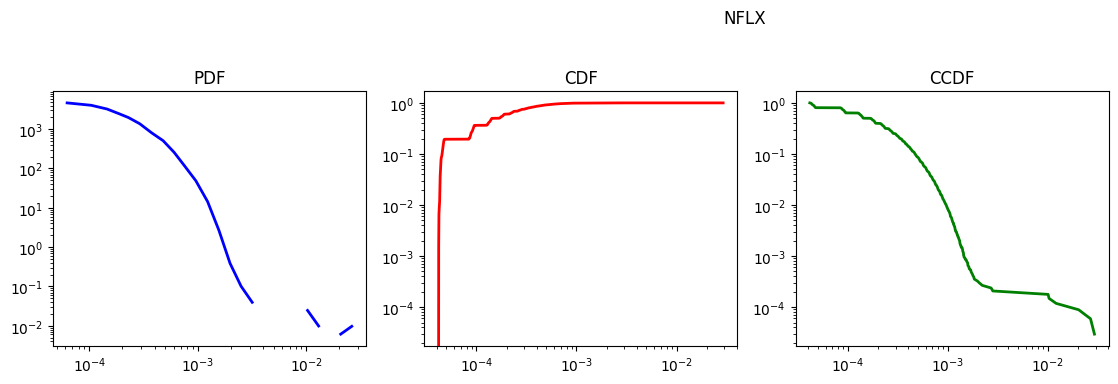

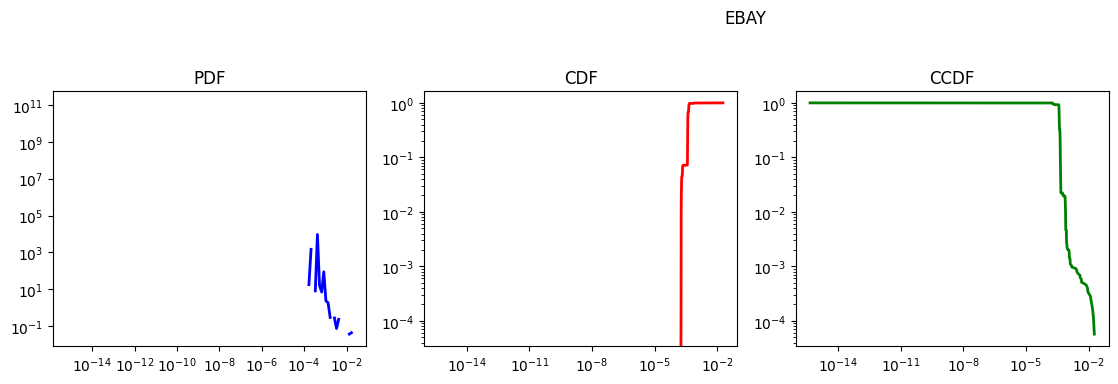

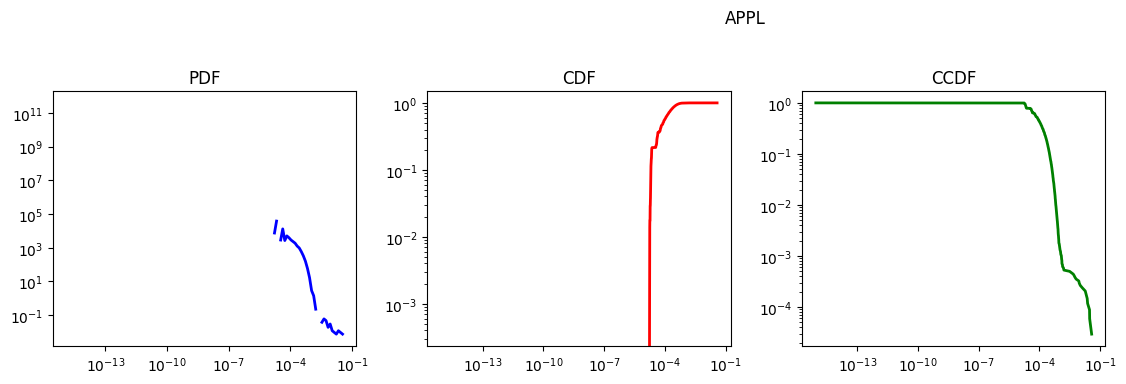

In [8]:
# Plot distribution of returns_magnitudes for each stock
for stock_name, data in log_returns.items():
    plot_distributions(stock_name, data)

### 3.3. Fit power law distribution to log returns

In [9]:
# 1. Fit Powerlaw and retrieve fitted object/ results
log_returns_distributions_data = os.path.join(root_dir, 'data', 'generated', 'mo_data', 'distributions', 'mo_log_returns_distributions.pkl')

if not os.path.exists(log_returns_distributions_data):
    log_returns_fit_objects = fit_powerlaw(log_returns, filename=log_returns_distributions_data)
else:
    log_returns_fit_objects = load_fit_objects(log_returns_distributions_data)

log_returns_fit_objects

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


{'TSLA': <powerlaw.Fit at 0x31472a910>,
 'MSFT': <powerlaw.Fit at 0x314e65fd0>,
 'AMZN': <powerlaw.Fit at 0x314e64e90>,
 'NFLX': <powerlaw.Fit at 0x314e76d10>,
 'EBAY': <powerlaw.Fit at 0x314e75fd0>,
 'APPL': <powerlaw.Fit at 0x314e74ad0>}

/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1507: RuntimeWarning: overflow encountered in divide
  likelihoods = f/C
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: divide by zero encountered in divide
  CDF = CDF/norm
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution give

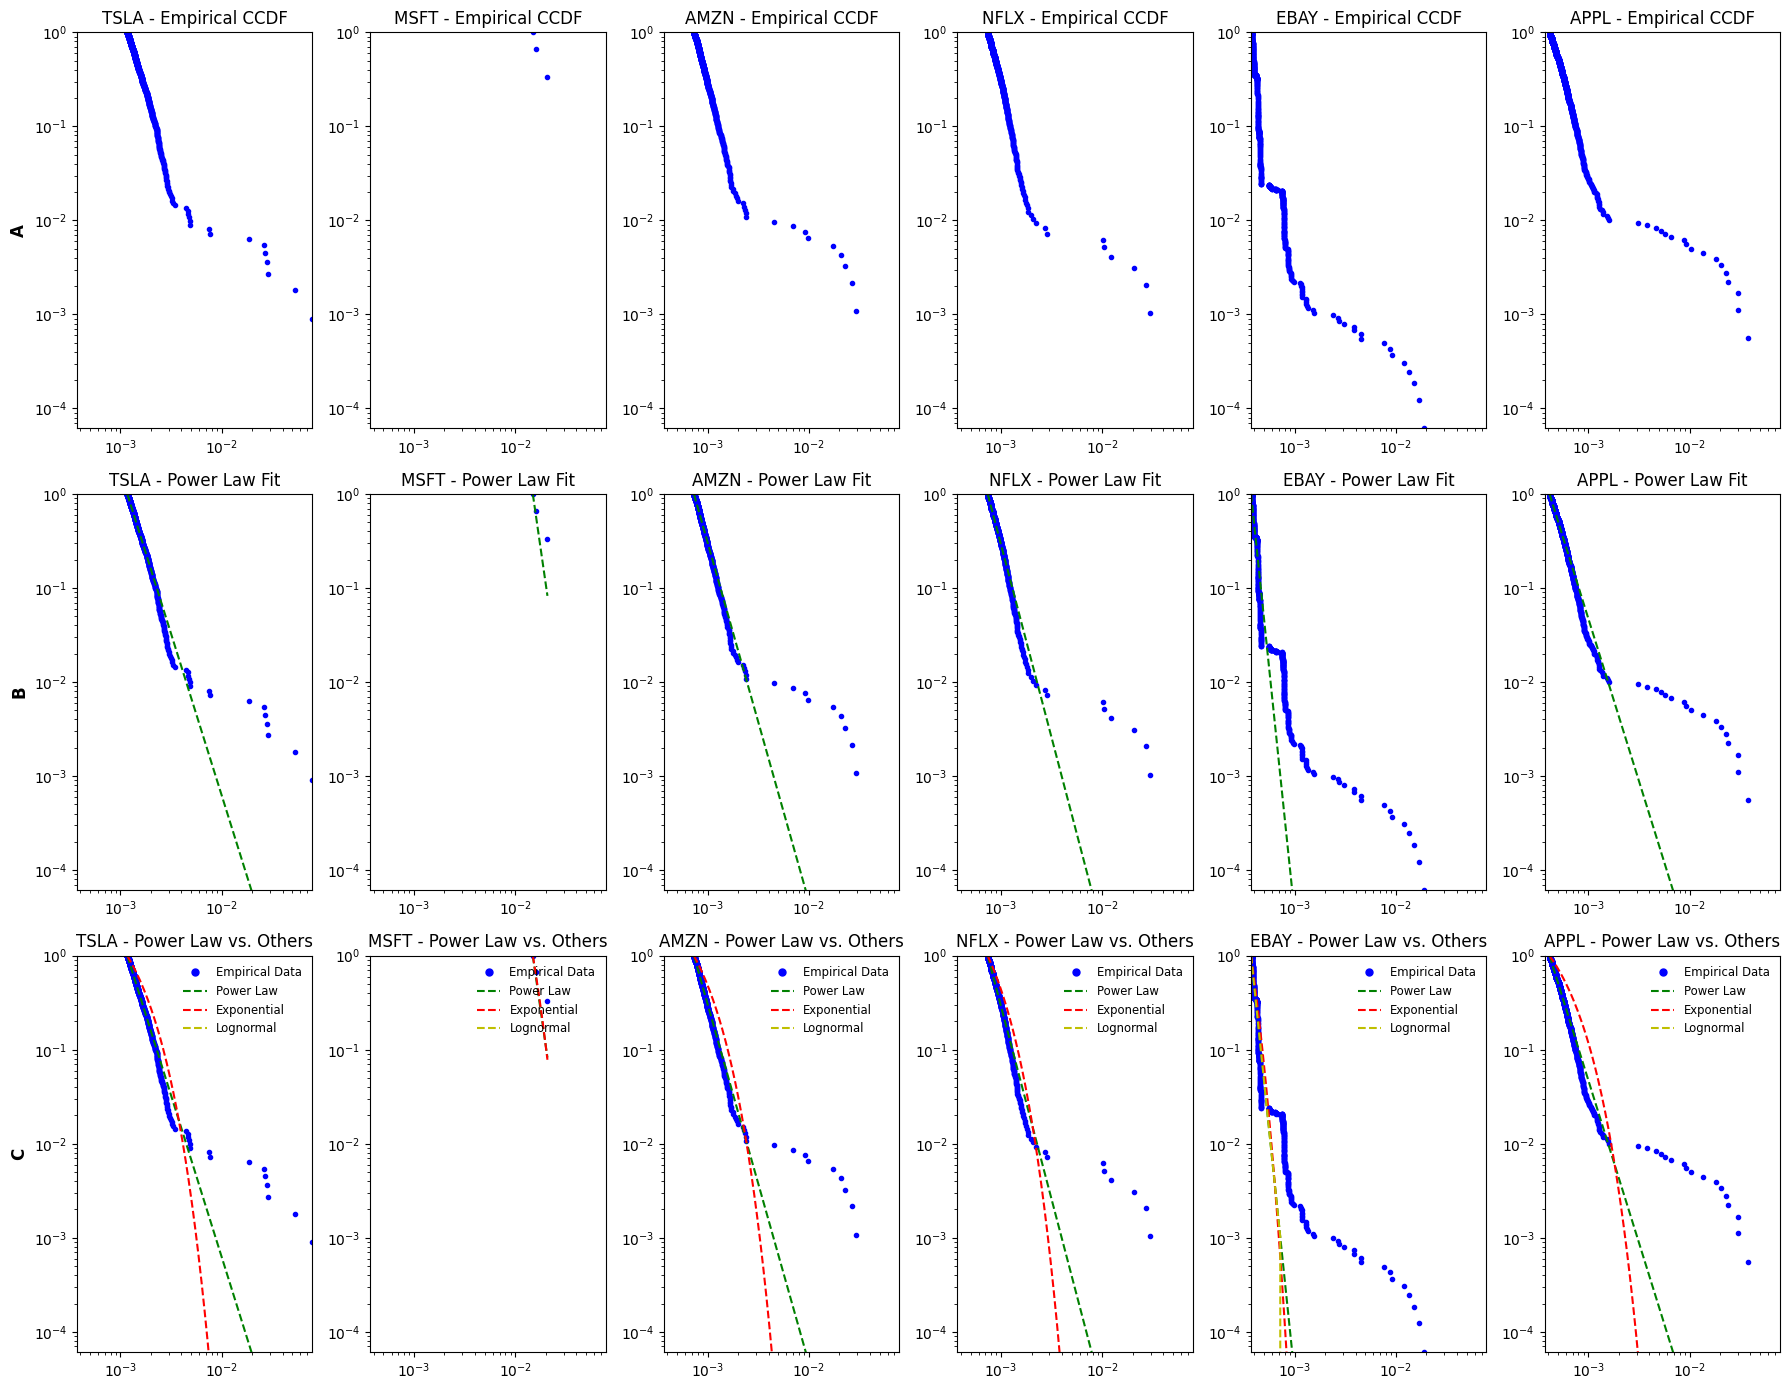

In [10]:
# Plot fitted objects
plot_fit_objects(log_returns_fit_objects)

#### 3.3.1. Retrieve Power law fitting results

In [11]:
# Get fitting parameters for specific distribution across all stocks
log_returns_power_results = get_fitting_params(log_returns_fit_objects, 'power_law')
print(log_returns_power_results)

  Stock Distribution      alpha      xmin  KS Distance
0  TSLA    power_law   4.438144  0.001170     0.024260
1  MSFT    power_law   8.492275  0.014913     0.250750
2  AMZN    power_law   4.817469  0.000734     0.029569
3  NFLX    power_law   5.107240  0.000737     0.032249
4  EBAY    power_law  11.378227  0.000371     0.100760
5  APPL    power_law   4.455844  0.000414     0.033596


In [12]:
# Average Alpha exponents across stocks
min_alpha = log_returns_power_results['alpha'].min()
max_alpha = log_returns_power_results['alpha'].max()
avg_alpha = log_returns_power_results['alpha'].mean()
std_dev_alpha = log_returns_power_results['alpha'].std()

print(f"Min Alpha: {min_alpha}")
print(f"Max Alpha: {max_alpha}")
print(f"Average Alpha: {avg_alpha}")
print(f"std_dev_alpha: {std_dev_alpha}")

Min Alpha: 4.438144397062169
Max Alpha: 11.378226750948327
Average Alpha: 6.448199757795098
std_dev_alpha: 2.8618411751705395


#### 3.3.2. Compare Alternative Distributions

In [13]:
# Compare against alternative heavy-tailed distributions
from IPython.display import display
log_returns_powerlaw_exponential = distribution_compare(log_returns_fit_objects, 'exponential')
display(log_returns_powerlaw_exponential)

,Stock,Alternative Distribution,Lambda,xmin,Power Law Alpha,KS Distance (Power Law),KS Distance (exponential),Loglikelihood Ratio,p-value
0,TSLA,exponential,1549.007246,0.001170,4.438144,0.024260,0.186439,2.909905,0.003615
1,MSFT,exponential,432.769895,0.014913,8.492275,0.250750,0.255176,0.239703,0.810560
2,AMZN,exponential,2712.363068,0.000734,4.817469,0.029569,0.208816,3.377687,0.000731
3,NFLX,exponential,3192.552317,0.000737,5.107240,0.032249,0.150578,2.679541,0.007372
4,EBAY,exponential,21109.784741,0.000371,11.378227,0.100760,0.184242,4.476156,0.000008
5,APPL,exponential,3631.017343,0.000414,4.455844,0.033596,0.251282,4.504562,0.000007


## 4. Return magnitudes (volatility)

In [14]:
# Return magnitude (volatility)
tsla_returns = compute_returns(tsla_raw_df)['returns']
msft_returns = compute_returns(msft_raw_df)['returns']
amzn_returns = compute_returns(amzn_raw_df)['returns']
nflx_returns = compute_returns(nflx_raw_df)['returns']
ebay_returns = compute_returns(ebay_raw_df)['returns']
appl_returns = compute_returns(appl_raw_df)['returns']

return_magnitudes = {
  'TSLA': abs(tsla_returns),
  'MSFT': abs(msft_returns),
  'AMZN': abs(amzn_returns),
  'NFLX': abs(nflx_returns),
  'EBAY': abs(ebay_returns),
  'APPL': abs(appl_returns)
}
# Update the dictionary to only keep the first EVENTS_RANGE items
# log_returns = {stock: data.head(EVENTS_RANGE) for stock, data in log_returns.items()}

### 4.1. Stationarity Test

In [15]:
# ADF test
for stock, data in return_magnitudes.items():
    augmented_dickey_fuller(data.head(EVENTS_RANGE), stock)

TSLA
ADF: -29.68
p-value: 0.00,
N: 99931, 
critical values: {'1%': -3.4304154398333235, '5%': -2.861568923380865, '10%': -2.5667853949035773}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


MSFT
ADF: -42.01
p-value: 0.00,
N: 99957, 
critical values: {'1%': -3.43041542281121, '5%': -2.861568915857441, '10%': -2.5667853908991076}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


AMZN
ADF: -36.67
p-value: 0.00,
N: 99945, 
critical values: {'1%': -3.4304154306664696, '5%': -2.8615689193293044, '10%': -2.5667853927470654}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


NFLX
ADF: -30.86
p-value: 0.00,
N: 99932, 
critical values: {'1%': -3.430415439178463, '5%': -2.8615689230914305, '10%': -2.566785394749521}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


EBAY
A

### 4.2. Volatility density functions

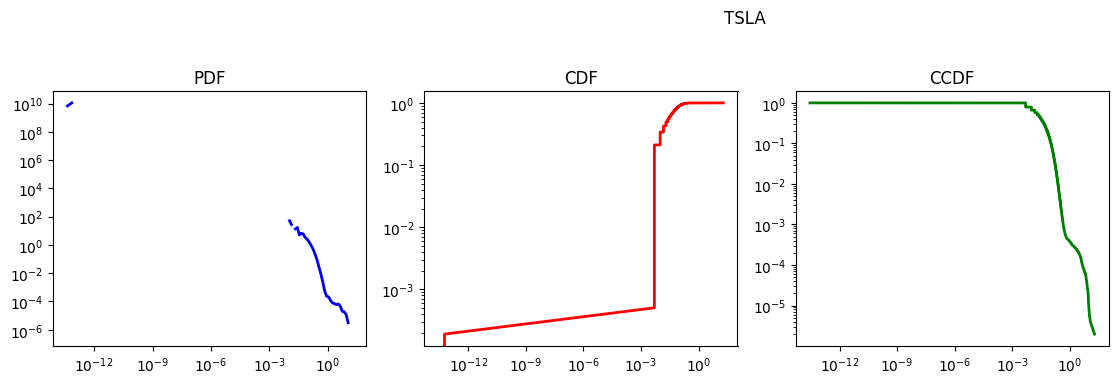

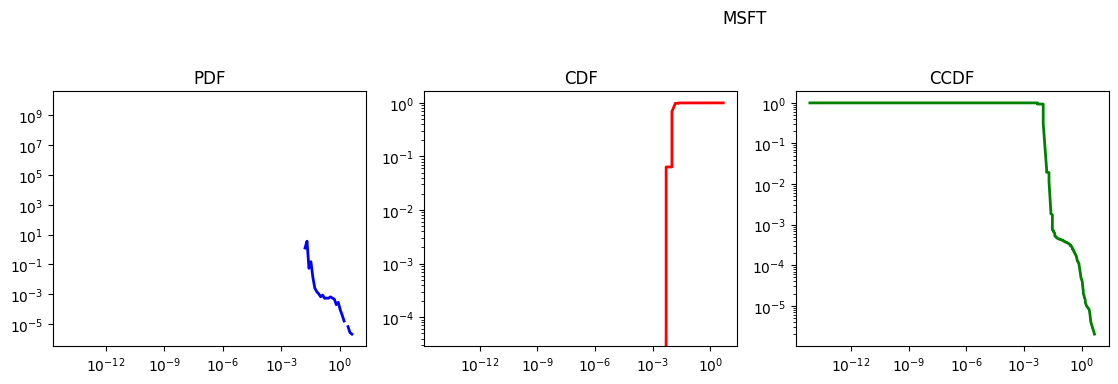

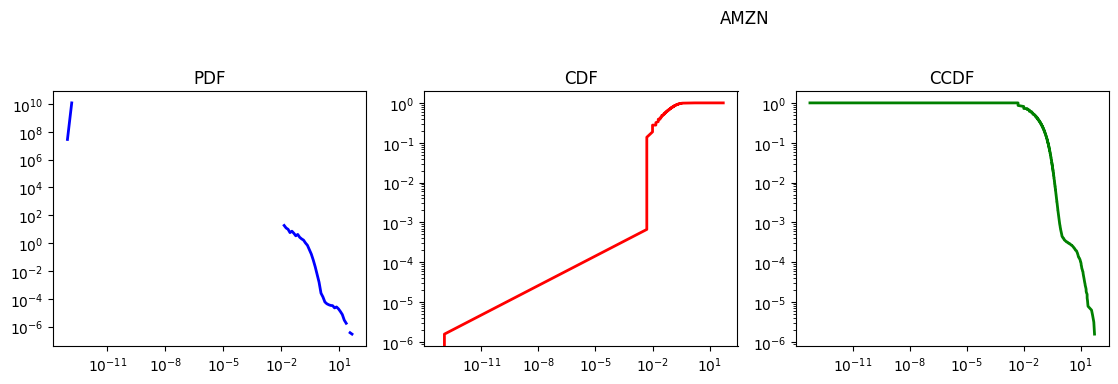

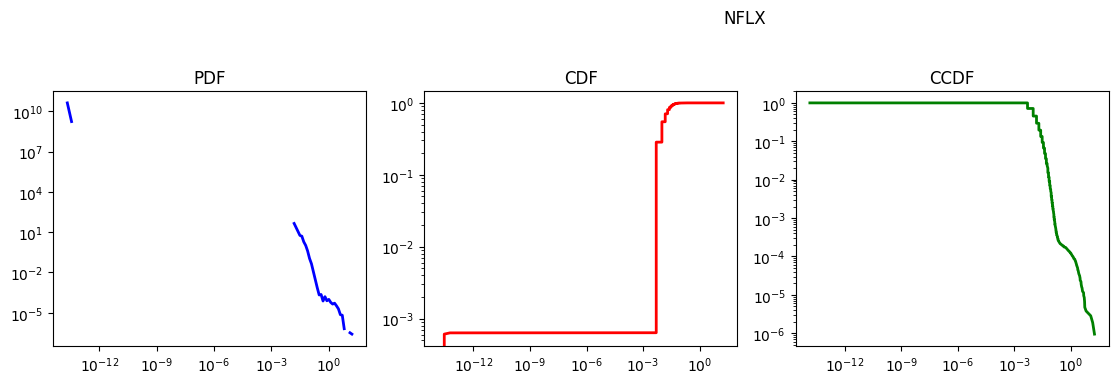

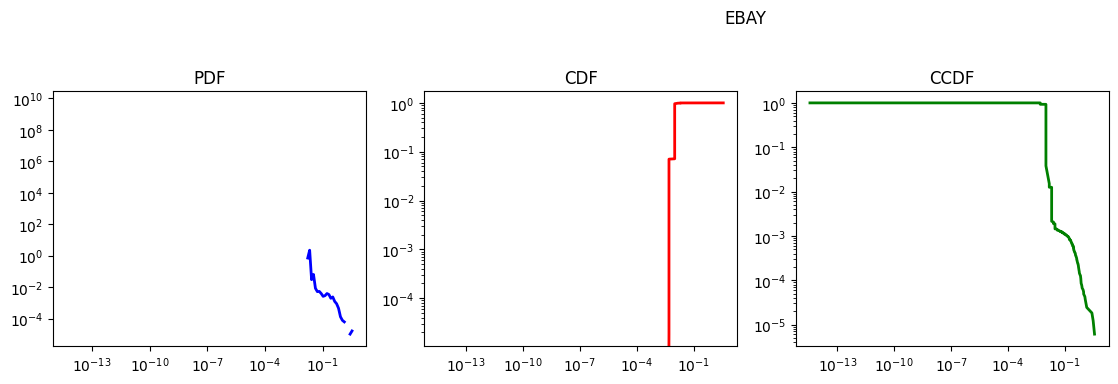

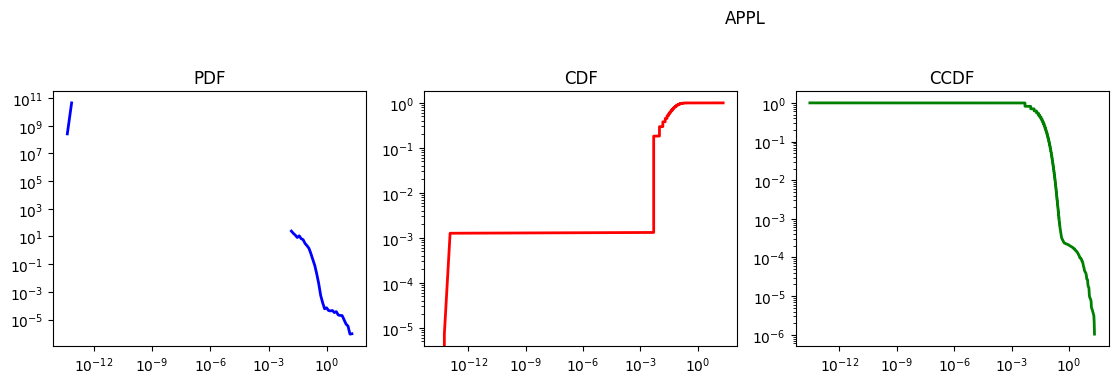

In [16]:
# Plot distribution of returns_magnitudes for each stock
for stock_name, data in return_magnitudes.items():
    plot_distributions(stock_name, data)

### 4.3. Fit power law distribution to percentage returns

In [17]:
# 1. Fit Powerlaw and retrieve fitted object/ results
volatility_data = os.path.join(root_dir, 'data', 'generated', 'mo_data', 'distributions', 'mo_volatility_distributions.pkl')

if not os.path.exists(volatility_data):
    volatility_fit_objects = fit_powerlaw(return_magnitudes, filename=volatility_data)
else:
    volatility_fit_objects = load_fit_objects(volatility_data)

volatility_fit_objects

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


{'TSLA': <powerlaw.Fit at 0x314c313d0>,
 'MSFT': <powerlaw.Fit at 0x313e72110>,
 'AMZN': <powerlaw.Fit at 0x313e70a50>,
 'NFLX': <powerlaw.Fit at 0x313cf2450>,
 'EBAY': <powerlaw.Fit at 0x314989890>,
 'APPL': <powerlaw.Fit at 0x32da78d90>}

/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/ana_bug

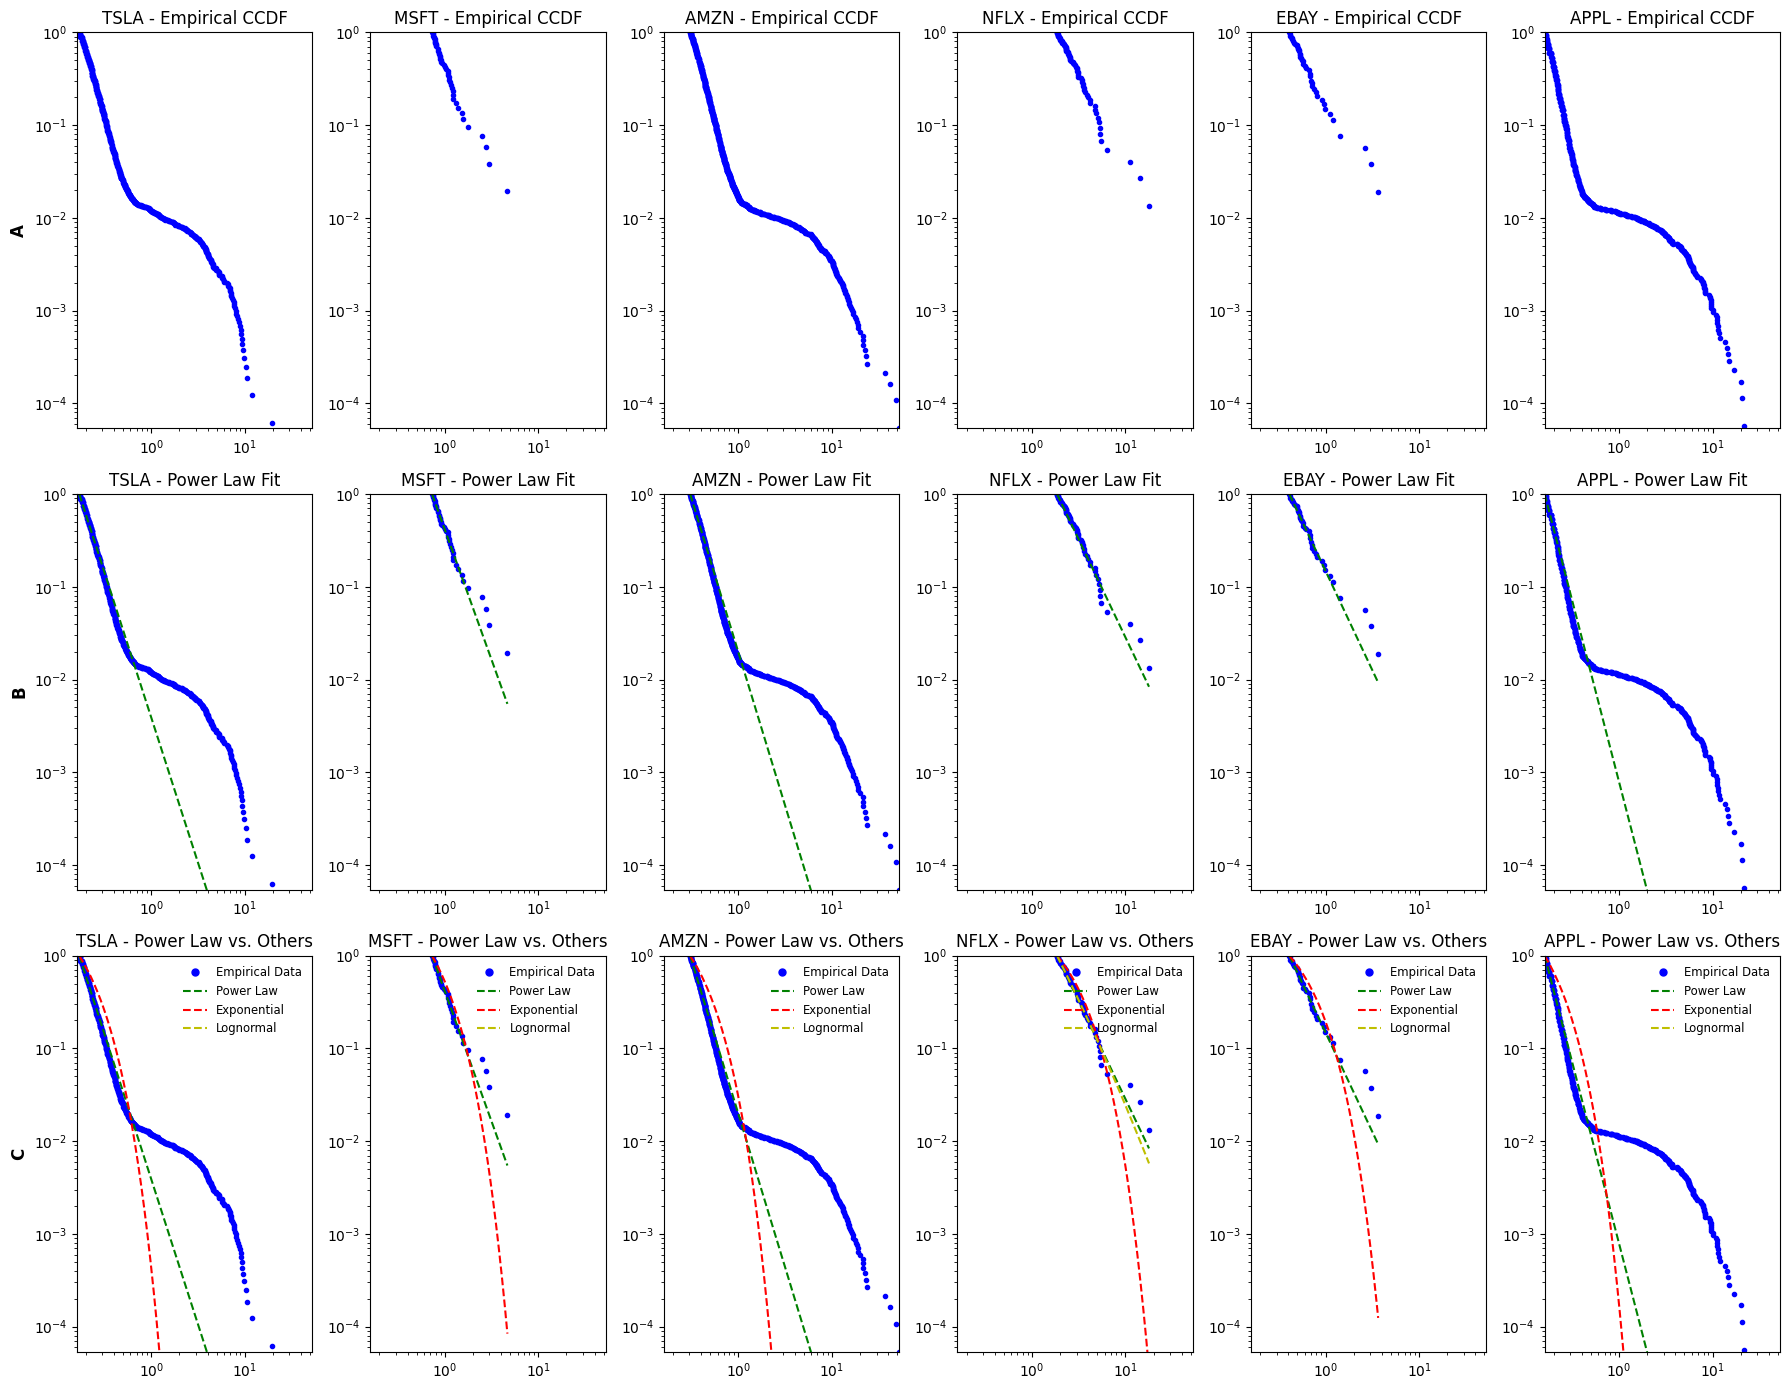

In [18]:
# Plot fitted objects
plot_fit_objects(volatility_fit_objects)

#### 4.3.1. Retrieve Power law fitting results

In [19]:
# Get fitting parameters for specific distribution across all stocks
volatility_fit_results = get_fitting_params(volatility_fit_objects, 'power_law')
print(volatility_fit_results)

  Stock Distribution     alpha   xmin  KS Distance
0  TSLA    power_law  4.130333  0.170     0.046624
1  MSFT    power_law  3.806991  0.730     0.054107
2  AMZN    power_law  4.308238  0.305     0.032523
3  NFLX    power_law  3.113174  1.855     0.055235
4  EBAY    power_law  3.139655  0.410     0.052937
5  APPL    power_law  4.901875  0.160     0.056475


In [20]:
# Average Alpha exponents across stocks
min_alpha = volatility_fit_results['alpha'].min()
max_alpha = volatility_fit_results['alpha'].max()
avg_alpha = volatility_fit_results['alpha'].mean()
std_dev_alpha = volatility_fit_results['alpha'].std()

print(f"Min Alpha: {min_alpha}")
print(f"Max Alpha: {max_alpha}")
print(f"Average Alpha: {avg_alpha}")
print(f"std_dev_alpha: {std_dev_alpha}")

Min Alpha: 3.1131743625399455
Max Alpha: 4.901875009697774
Average Alpha: 3.9000444662884894
std_dev_alpha: 0.6970414883962968


#### 3.3.2. Compare Alternative Distributions

In [21]:
# Compare against alternative heavy-tailed distributions
from IPython.display import display
volatility_powerlaw_exponential = distribution_compare(volatility_fit_objects, 'exponential')
display(volatility_powerlaw_exponential)

,Stock,Alternative Distribution,Lambda,xmin,Power Law Alpha,KS Distance (Power Law),KS Distance (exponential),Loglikelihood Ratio,p-value
0,TSLA,exponential,9.332323,0.170,4.130333,0.046624,0.204073,13.297164,2.404141e-40
1,MSFT,exponential,2.381483,0.730,3.806991,0.054107,0.163922,1.880817,5.999684e-02
2,AMZN,exponential,5.044501,0.305,4.308238,0.032523,0.235781,13.609300,3.526051e-42
3,NFLX,exponential,0.642562,1.855,3.113174,0.055235,0.120930,1.398784,1.618777e-01
4,EBAY,exponential,2.771269,0.410,3.139655,0.052937,0.171475,2.106569,3.515495e-02
5,APPL,exponential,10.325328,0.160,4.901875,0.056475,0.295971,15.457821,6.682128e-54
